## <span style="color:Aquagreen">**Exercise: Finding Optimal Model and Hyperparameters for dataset**</span>
For digits dataset in sklearn.dataset, let's try following classifiers and find out the one that gives best performance. Also find the optimal parameters for that classifier.

```python
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
```

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
digits=load_digits()


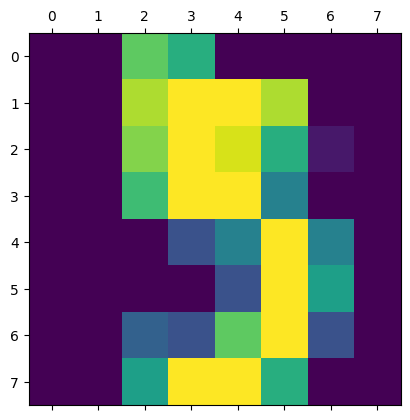

In [3]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[5])

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### <span style="color:limegreen">**Use GridSearchCV**</span>
- Using SVM here

In [5]:
from sklearn.model_selection import GridSearchCV
gcv=GridSearchCV(SVC(),{
    'C':[1,10,20],
    'kernel':['linear','poly','rbf'],
    'gamma':['auto']
}, cv=5 )

gcv.fit(digits.data, digits.target)
gcv.cv_results_

{'mean_fit_time': array([0.01818843, 0.01980238, 0.19572897, 0.02061467, 0.02181349,
        0.19454532, 0.02204161, 0.02136769, 0.19083257]),
 'std_fit_time': array([0.00794311, 0.00712194, 0.01236378, 0.0003993 , 0.00571981,
        0.01663507, 0.00638081, 0.00771919, 0.00549757]),
 'mean_score_time': array([0.00752006, 0.00678167, 0.23046675, 0.00447044, 0.01048141,
        0.24264698, 0.00269361, 0.00686035, 0.22597795]),
 'std_score_time': array([0.00772514, 0.00794576, 0.00884281, 0.00057706, 0.00663488,
        0.00888871, 0.00507045, 0.00727744, 0.00665808]),
 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=['auto', 'auto', 'auto', 'auto', 'auto', 'auto', 'auto',
                    'auto', 'auto'],
              mask=[False, False, False, False, False, False, False, False,
 

In [6]:
df=pd.DataFrame(gcv.cv_results_)[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score']]
df

,param_C,param_kernel,param_gamma,mean_test_score
0,1,linear,auto,0.947697
1,1,poly,auto,0.968842
2,1,rbf,auto,0.448545
3,10,linear,auto,0.947697
4,10,poly,auto,0.968842
5,10,rbf,auto,0.476366
6,20,linear,auto,0.947697
7,20,poly,auto,0.968842
8,20,rbf,auto,0.476366


In [7]:
gcv.best_score_, gcv.best_params_

(0.96884246363355, {'C': 1, 'gamma': 'auto', 'kernel': 'poly'})

In [8]:
gcv.best_estimator_

SVC(C=1, gamma='auto', kernel='poly')

### <span style="color:limegreen">**Use RadomizedSearchCV**</span>
- Using SVM here as well

In [9]:
from sklearn.model_selection import RandomizedSearchCV

# Define the model and parameters
param_grid={
    'C':[1,10,20],
    'kernel':['linear','rbf','poly'],
    'gamma':['auto']
}

# Initialize RandomizedSearchCV with the model parameters
rscv=RandomizedSearchCV(SVC(), param_grid, cv=5, n_iter=2)

# Fit the model to the data
rscv.fit(digits.data, digits.target)

df2=pd.DataFrame(rscv.cv_results_)[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score']]
df2

,param_C,param_kernel,param_gamma,mean_test_score
0,10,poly,auto,0.968842
1,10,rbf,auto,0.476366


### <span style="color:limegreen">**Finding the best model along with parameters**</span>

In [10]:
model_params={
    'svm':{
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['linear', 'rbf']
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1,10,20],
        }
    },
    'gaussian_nb':{
        'model': GaussianNB(),
        'params':{}
    },
    'multinomial_nb':{
        'model': MultinomialNB(),
        'params':{}
    },
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 20, 60],
            'criterion': ['gini', 'entropy']
        }
    }

}

In [11]:
scores=[]

for model_name, mparam in model_params.items():
    clf=GridSearchCV(mparam['model'], mparam['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df=pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,logistic_regression,0.922114,{'C': 1}
2,gaussian_nb,0.806928,{}
3,multinomial_nb,0.870350,{}
4,decision_tree,0.808576,{'criterion': 'entropy'}
5,random_forest,0.940475,"{'criterion': 'entropy', 'n_estimators': 60}"


### <span style="color:limegreen">**CONCLUSION**</span>

**The SVM model with linear kernel is the most suitable for this dataset, balancing simplicity and high accuracy. Random Forest is a competitive alternative, particularly if ensemble methods are preferred.**